# Exploring the Aya dataset

This notebook is a simple exploration of the Aya dataset. It's not necessary to go through this notebook if you just want to get started! 

In [1]:
from datasets import load_dataset
from collections import Counter
import squarify
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Let's start by loading the data and taking a look at it.

In [2]:
ds = load_dataset("CohereForAI/aya_dataset", split="train")

Let's start by taking a look at the column in the dataset.

In [3]:
ds

Dataset({
    features: ['inputs', 'targets', 'language', 'language_code', 'annotation_type', 'user_id'],
    num_rows: 202362
})

we can also look at an example row so we know better what the data looks like.

In [4]:
ds[0]

{'inputs': 'Heestan waxaa qada Khalid Haref Ahmed \nOO ku Jiray Kooxdii Dur Dur!',
 'targets': "Habeen ma hurdoo\nAday horjoogoo\nDharaar ma hargalo\nAduun baabay helayee\nRuntii ku helayoo\nCaawaan iman iman\nOonkaan u liitay\nIga ba'ay harraadkiisa\n\nHannaan wanaageey\nHadal macaaneey\nWadnahaad haleeshayoo\nWaad hirgalaysaa\nRuntii ku helayoo\nMaantaan iman iman\nOonkaan u liitay\nIga ba'ay harraadkiisa\n\nOlolaha jacaylkeenna\nYididdiiladeeniyo\nuur midoo fiyowbaan\nku abaabulaynaa\nUbixii aan beernaan\nku intifaacsanaynaa\nCaawaan iman iman\nOonkaan u liitay\nIga ba'ay harraadkiisa\n\nAfar gu' iyo dheeraad\nAxdigaynu taagnay\nAyaan dantiyo guur\nu adkaynay gaarnoo\nMarwadayda noqotoo\nUbad daadahaysee\nCaawaan iman iman\nOonkaan u liitay\nIga ba'ay harraadkiisa...",
 'language': 'Somali',
 'language_code': 'som',
 'annotation_type': 'original-annotations',
 'user_id': 'f0ff69570af705b75c5a0851883e502feab2bc874c5e98d59145659bd18ca635'}

We can see we have the following columns:
- an `input` column with the representing the prompt/instruction from the user
- a `target` column with a completion/response to the prompt
- `language` column with the language of the prompt/response
- `language_code` column with the language code of the prompt/response
- `annotation_type` column with the type of annotation
- `user_id` column with an anonymous user id

We can start by getting some high level sense of the dataset.

In [5]:
unique_langs = ds.unique('language')
len(unique_langs)

71

We may also want to know how the languages are distributed in the dataset.

In [21]:
df = ds.remove_columns([c for c in ds.column_names if c not in {'language','user_id','annotation_type'}]).to_pandas()

In [26]:
df.to_csv('data.csv', index=False)

In [27]:
df

,language,annotation_type,user_id
0,Somali,original-annotations,f0ff69570af705b75c5a0851883e502feab2bc874c5e98...
1,French,re-annotations,5bd125e28d277d4fbc168f7accbcd05477951aea60008b...
2,Standard Arabic,original-annotations,13c05f2d3912479e80ce8aea399db395ce766b841c936c...
3,Tamil,re-annotations,91d8bea5f24cef25452aa5bca663c116e59d8265478b9a...
4,Sinhala,original-annotations,29f22cf193a81e1a5c47d76af453a91b3cd19aa348995c...
...,...,...,...
202357,Plateau Malagasy,original-annotations,96929ca9ed95db38a8e1ae44df242181ea1ce802f3b299...
202358,Kyrgyz,original-annotations,7f2e2b3165dbe93249e5e79d1fe1d514036322590f0132...
202359,Nepali,original-annotations,c233f1588d62cecd6e0c2018a1865e8089d6164a443b70...
202360,Tamil,original-annotations,5f662796d5d0122168748a5d5dec607ba9256c5d465241...


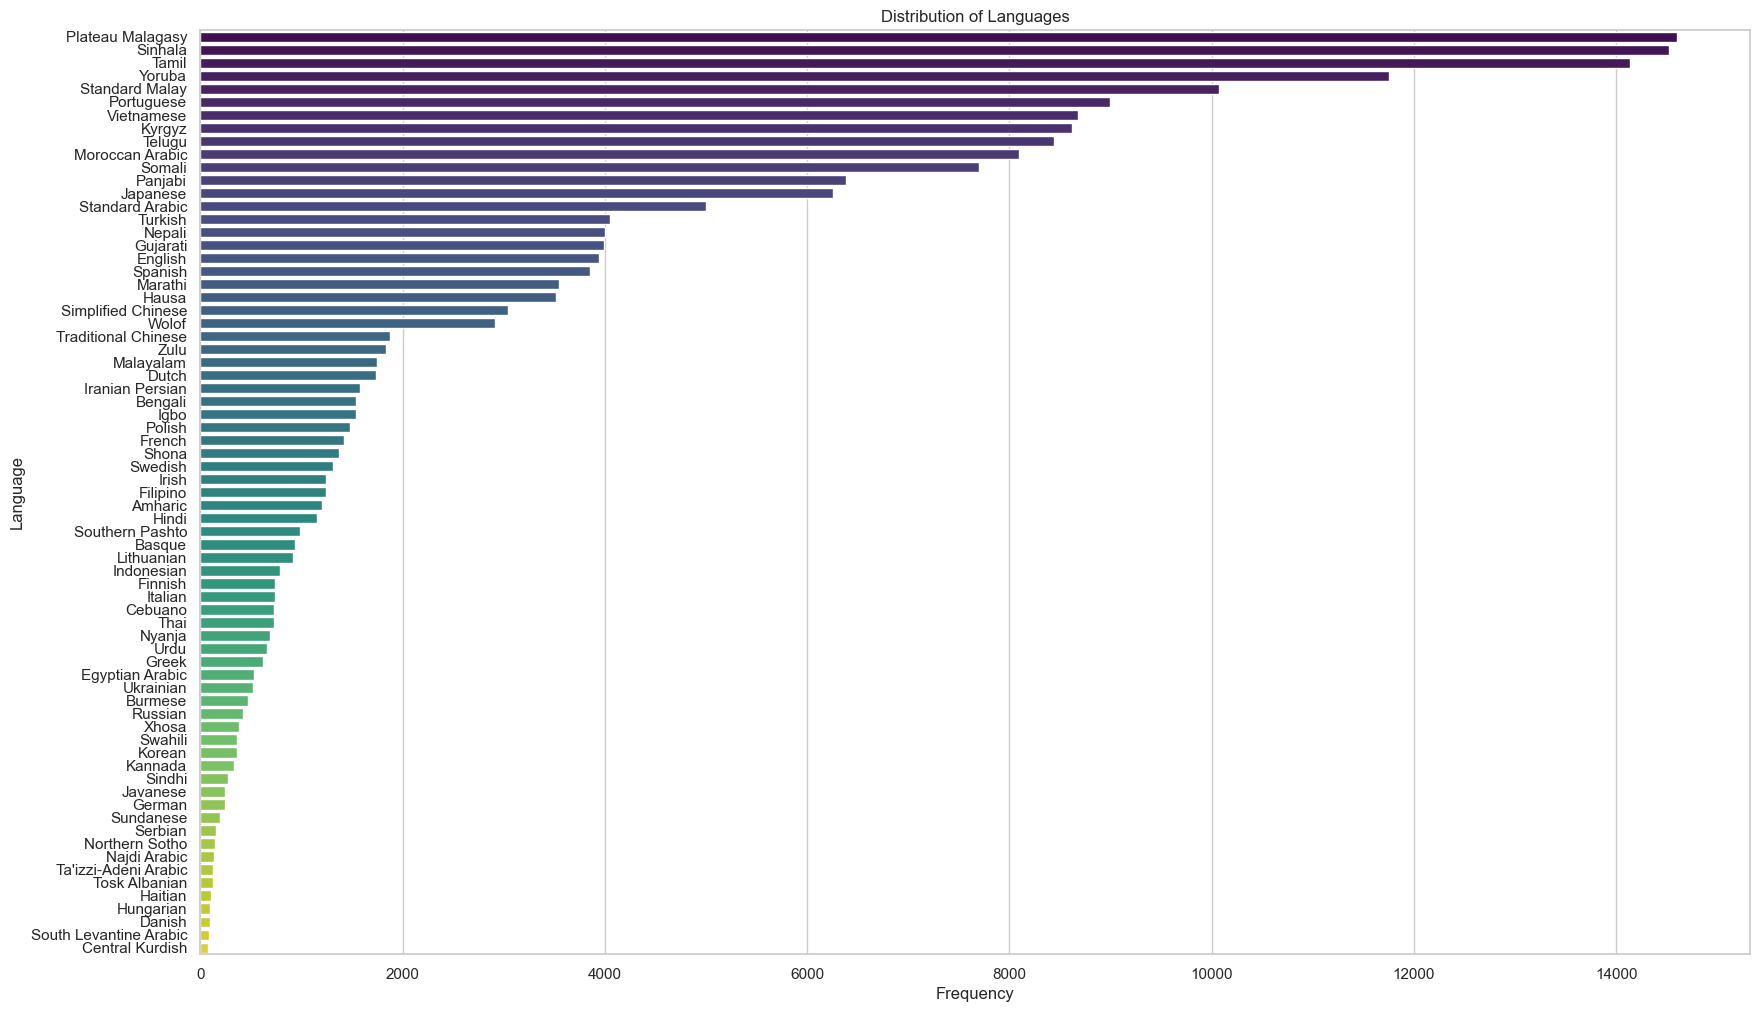

In [48]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(20, 12))
language_counts = df["language"].value_counts()
sns.barplot(
    x=language_counts.values,
    y=language_counts.index,
    hue=language_counts.index,
    palette="viridis",
    dodge=False,
)
plt.title("Distribution of Languages")
plt.xlabel("Frequency")
plt.ylabel("Language")
plt.legend([], [], frameon=False)
plt.show()

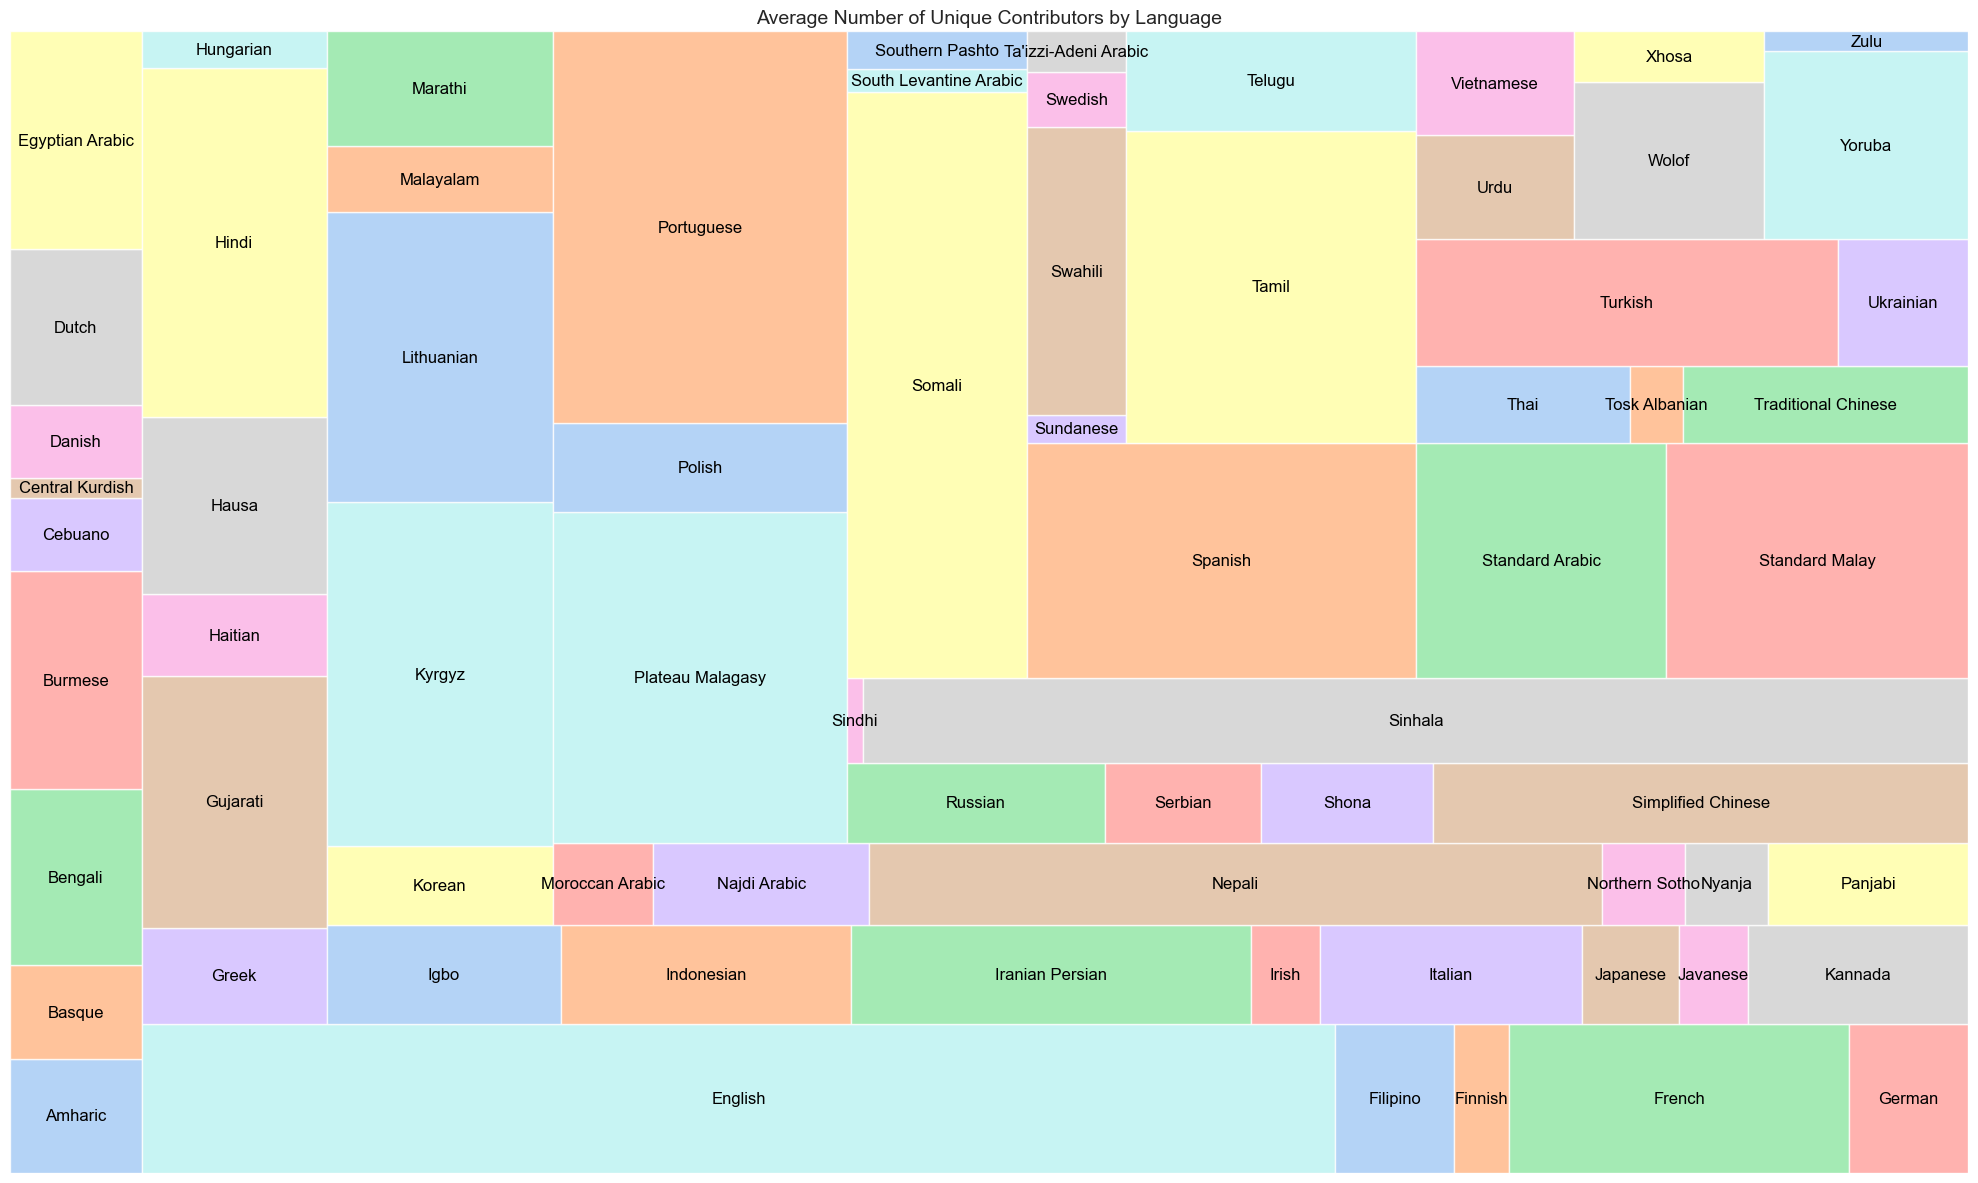

In [83]:
grouped_data = data.groupby("language")["user_id"].nunique()

plt.figure(figsize=(20, 12))
colors = sns.color_palette("pastel", len(grouped_data)).as_hex()
squarify.plot(
    sizes=grouped_data.values,
    label=grouped_data.index,
    color=colors,
    alpha=0.8,
    text_kwargs={"color": "black"},
)

plt.title("Average Number of Unique Contributors by Language", fontsize=14)

plt.axis("off")
plt.tight_layout()
plt.show()